In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import src.util as util
from src.linear_model import LinearModel

In [3]:
class LogisticRegression(LinearModel):
    """Logistic regression with Newton's Method as the solver.

    Example usage:
        > clf = LogisticRegression()
        > clf.fit(x_train, y_train)
        > clf.predict(x_eval)
    """

    def fit(self, x, y):
        """Run Newton's Method to minimize J(theta) for logistic regression.

        Args:
            x: Training example inputs. Shape (m, n).
            y: Training example labels. Shape (m,).
        """
        # *** START CODE HERE ***
        def sigmoid(x):
            return 1 / (1 + np.exp(-x))

        m, n = x.shape

        # initialize theta as 0 vector
        if self.theta is None:
            self.theta = np.zeros(n)

        while True:
            g = sigmoid(x @ self.theta)                          # (m,)
            gradient = (x.T @ (g - y)) * (1 / m)                 # (n,)
            g = g.reshape((-1, 1))
            hessian = x.T @ (g * (1 - g) * x) * (1 / m)          # n * n

            theta = self.theta - np.linalg.inv(hessian) @ gradient

            if np.linalg.norm(theta - self.theta, ord = 1) < self.eps:
                self.theta = theta
                break

            self.theta = theta
        # *** END CODE HERE ***

    def predict(self, x):
        """Make a prediction given new inputs x.

        Args:
            x: Inputs of shape (m, n).

        Returns:
            Outputs of shape (m,).
        """
        # *** START CODE HERE ***
        y = x @ self.theta
        y = np.where(y < 0, 0, 1)
        return y
        # *** END CODE HERE ***

In [4]:
train_path = 'data/ds3_train.csv'
valid_path = 'data/ds3_valid.csv'
test_path = 'data/ds3_test.csv'

In [5]:
x_train, t_train = util.load_dataset(train_path, label_col='t', add_intercept=True)
x_test, t_test = util.load_dataset(test_path, label_col='t', add_intercept=True)

clf = LogisticRegression()
clf.fit(x_train, t_train)

In [6]:
clf.theta

array([-0.9711418 ,  2.73208784,  1.07403478])

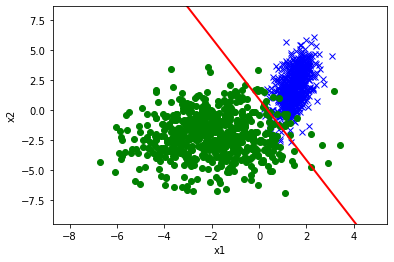

In [7]:
util.plot(x_train, t_train, clf.theta, 'p2_c1')

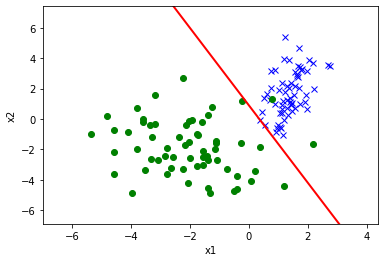

In [8]:
util.plot(x_test, t_test, clf.theta, 'p2_c2')

In [9]:
print(f'the accuracy is {np.mean(clf.predict(x_test) == t_test)}')

the accuracy is 0.9838709677419355


In [10]:
x_train, y_train = util.load_dataset(train_path, add_intercept=True)
x_test, y_test = util.load_dataset(test_path, add_intercept=True)

clf = LogisticRegression()
clf.fit(x_train, y_train)

In [11]:
clf.theta

array([-2.91607454,  0.78596651,  0.09282768])

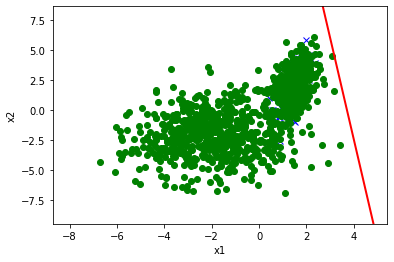

In [12]:
util.plot(x_train, y_train, clf.theta, 'p2_d1')

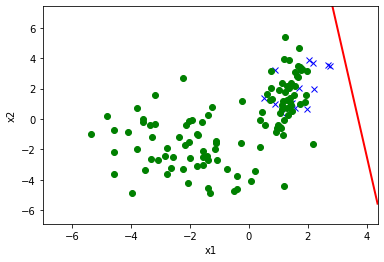

In [13]:
util.plot(x_test, y_test, clf.theta, 'p2_d2')

In [14]:
print(f'the accuracy is {np.mean(clf.predict(x_test) == y_test)}')

the accuracy is 0.8870967741935484


In [26]:
x_valid, y_valid = util.load_dataset(valid_path, add_intercept=True)

def sigmoid(x, theta):
    return 1 / (1 + np.exp(-np.dot(x, theta)))

alpha = np.mean((h(x_valid, clf.theta))[y_valid == 1])

In [28]:
print(f'alpha is {alpha}')

alpha is 0.17174527144749674


In [29]:
correction = 1 + (np.log(2 / alpha - 1) / clf.theta[0])

In [30]:
print(f'correction is {correction}')

correction is 0.18894230515872057


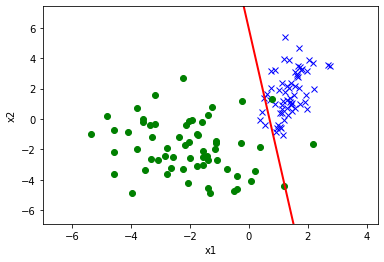

In [35]:
x_test, t_test = util.load_dataset(test_path, label_col='t', add_intercept=True)

util.plot(x_test, t_test, clf.theta, 'p2_e', correction)

In [36]:
t_e = sigmoid(x_test, clf.theta) / alpha
np.mean(t_e == t_test)

0.0